# Analysis of the tmdb movie dataset

### Introduction
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
- There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### The following questions will be answered
- Which directors have the highest number of movies?
- What is the distribution of runtime?
- Which year has the highest number of movies?
- How many movies have a higher revenue_adj than budget_adj?
- Which genres are the most popular?

In [1]:
# import necessary libraries
import pandas as pd
from matplotlib import pyplot as plt

# plot graphies inside the notebook
%matplotlib inline

In [2]:
# read in the data file
data = pd.read_csv("tmdb-movies.csv")
print("length of dataset: ", len(data))

length of dataset:  10866


Notice that the dataset has 10866 rows which is larger than 10000. This means the dataset contains duplicates which we'll need to remove.

In [3]:
# explore the columns
data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [4]:
# remove dupplicates based on 'id', 'imdb_id' and 'original_title'
data.drop_duplicates(subset=['id'], keep="first", inplace=True)
data.drop_duplicates(subset=['imdb_id'], keep="first", inplace=True)
data.drop_duplicates(subset=['original_title'], keep="first", inplace=True)
print("length of datset after removing duplicates: ", len(data))

length of datset after removing duplicates:  10562


In [5]:
# only the following columns will be considered in this analysis

reduced_columns = [
    u'popularity', 
    u'original_title', 
    u'director',
    u'runtime', 
    u'genres',
    u'release_date', 
    u'vote_count',
    u'vote_average', 
    u'release_year', 
    u'budget_adj', 
    u'revenue_adj',
]

# modify data by picking only the chosen clumns
data = data[reduced_columns]

In [6]:
# look at the first data points
data.head()

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
# drop nulls
data.dropna(axis=0, how='any', inplace=True)
print("length of dataset after dropping na: ", len(data))

length of dataset after dropping na:  10502


In [8]:
# statistical summary of all numerical features
data.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10502.000000,10502.000000,10502.000000,10502.000000,10502.000000,1.050200e+04,1.050200e+04
mean,0.651189,101.970482,220.201200,5.964226,2001.605504,1.773266e+07,5.150676e+07
std,1.010033,29.686950,581.479195,0.935961,12.602750,3.453962e+07,1.448978e+08
min,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.208645,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.385824,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.718802,111.000000,149.000000,6.600000,2011.000000,2.103337e+07,3.401582e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Which directors have the highest number of movies?

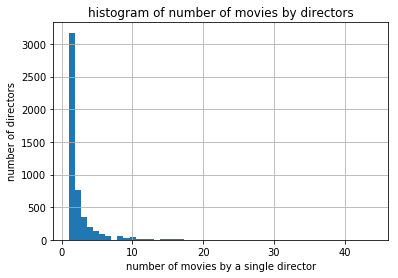

In [9]:
# group data by "director" and count points in each group
count_by_directors = data.groupby(["director"]).size()
# draw the histogram of number of movies by each director
count_by_directors.hist(bins=50);
plt.xlabel("number of movies by a single director");
plt.ylabel("number of directors");
plt.title("histogram of number of movies by directors");

From the above graph, we can see most directors have less than 10 movies, only very few directed more than 10 movies.

In [10]:
# show the first 10 directors with most number of movies made
count_by_directors.sort_values(ascending=False)[:10]

director
Woody Allen          44
Clint Eastwood       33
Steven Spielberg     29
Martin Scorsese      29
Steven Soderbergh    22
Ron Howard           22
Ridley Scott         21
Joel Schumacher      21
Barry Levinson       19
Brian De Palma       18
dtype: int64

The above directors are the most productive ones who directed a number of movies ranging from about 20 to 44.

### What is the distribution of runtime?

count    10502.000000
mean       101.970482
std         29.686950
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

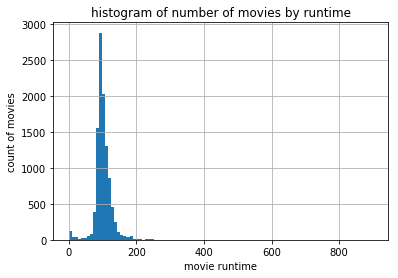

In [11]:
# display the distribution of runtime in a graph and with a stat summary
data['runtime'].hist(bins=100);
plt.xlabel("movie runtime");
plt.ylabel("count of movies");
plt.title("histogram of number of movies by runtime");
data['runtime'].describe()

From the above graph, we can see the runtime of movies has a very centered distribution around 102 minutes, which is very reasonable. However, we are also very interested in the rightmost outliers. So let's take the longest one to analyze. The longest movie is a documentary:

In [12]:
# detail about the longest movie
data[data['runtime'] == 900]

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,0.006925,The Story of Film: An Odyssey,Mark Cousins,900,Documentary,9/3/11,14,9.2,2011,0.0,0.0


The longest movie runs for 900 minutes. It turns out to be a documentary, so technically it is not a movie.

### - Which year has the highest number of movies?

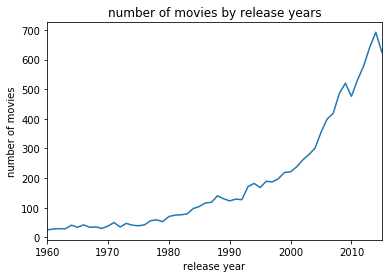

In [13]:
# group data by "release_year" and count in each group
count_by_years = data.groupby(["release_year"]).size()
# a plot of number of movies corresponding to release years
count_by_years.plot();
plt.xlabel("release year");
plt.ylabel("number of movies");
plt.title("number of movies by release years");

The above graph shows that the amount of movies increases exponentially since 1960 with some local variations.

In [14]:
# show the year with most movies made
count_by_years.sort_values(ascending=False)[:10]

release_year
2014    692
2013    641
2015    624
2012    578
2011    531
2009    520
2008    485
2010    476
2007    418
2006    399
dtype: int64

So the year 2014 has the highest number of movies. The total number is 692. The second and third are years 2013 and 2015. From the graph, we already know number of movies grows at an exponential rate up to now. So recent years have more movies to come.

### How many movies have a higher revenue_adj than budget_adj?

Most movies are commercial and entertainment products which shall generate profits. In this project, we'll define profit to be the difference between adjusted revenue and adjusted budget. So a profitable movie shall have a higher adjusted revenue than adjusted budget.

In [15]:
# remove zero values of adjusted revenues and adjusted budget
print("No. of movies with zero adjusted revenues: ", len(data[data['revenue_adj'] == 0]))
print("No. of movies with zero adjusted budget: ", len(data[data['budget_adj'] == 0]))
data_no_zero = data[(data['revenue_adj'] > 0) & (data['budget_adj'] > 0)]
print("Length of dataset: ", len(data_no_zero))

No. of movies with zero adjusted revenues:  5777
No. of movies with zero adjusted budget:  5480
Length of dataset:  3755


From the removal we can see that the dataset contains too many zero values for adjusted revenue and adjusted budget, which is quite problematic.

In [16]:
# get those movies with adjusted revenue highter than adjusted budget
profitable = data_no_zero[data_no_zero['revenue_adj'] > data_no_zero['budget_adj']]

In [17]:
# show number of profitable movies and the corresponding percentage
print(len(profitable)) 
print(len(profitable)/len(data_no_zero))

2699
0.7187749667110519


After removing those with zero adjusted revenue or budget, 71.88% percent of the 3755 movies are profitable.

### Which genres are the most popular?

Movies are categorized into different genres like comedy, thriller, drama, action, romance and etc. With some data manipulation, it is easy to see which genres are the most popular ones, based on the number of moview within each genre.

In [18]:
from collections import Counter
# show the most popular genres
genres = Counter()
genre_series = data["genres"].dropna()
for genre in genre_series:
    cur_genres = genre.split('|')
    for cur_genre in cur_genres:
        genres[cur_genre] += 1
genres.most_common()

[('Drama', 4616),
 ('Comedy', 3720),
 ('Thriller', 2796),
 ('Action', 2303),
 ('Romance', 1658),
 ('Horror', 1557),
 ('Adventure', 1418),
 ('Crime', 1311),
 ('Family', 1183),
 ('Science Fiction', 1178),
 ('Fantasy', 876),
 ('Mystery', 765),
 ('Animation', 680),
 ('Documentary', 502),
 ('Music', 391),
 ('History', 324),
 ('War', 264),
 ('Foreign', 181),
 ('Western', 162),
 ('TV Movie', 157)]

We can see the most popular genre is drama which contains 4616 movies, which is close to half of the total number of movies in this dataset. the following popular genres are comedy, thriller, action, romance, horror, adventure, etc. One should be noticed that a movie can have several genre types, that's why those numbers sum much higher than total number of movies, and we used '|' to split the genres feature.

## Conclusion
- Which directors have the highest number of movies?
    The ten directors having the highest number of movies are Woody Allen, Clint Eastwood, Steven Spielberg, Martin Scorsese, Ridley Scott, Steven Soderbergh, Ron Howard, Joel Schumacher, Brian De Palma, Wes Craven.    
- What is the distribution of runtime? Except some outliers having very larger runtime, the runtime has a Gaussian-like distribution with mean 101.97(min) and std 29.69(min).
- Which year has the highest number of movies? The year 2014 has the highest number of movies: 692.
- How many movies have a higher revenue_adj than budget_adj? 2699 moives (about two thirds) have higher adjusted revenue than adjusted budget.
- Which genres are the most popular? The most popular genres are drama, comedy, thriller, action, romance, horror, adventure.

## Limitations
- dataset contains duplicates, null values
- dataset contains many zero values for runtime, adjusted revenue and adjusted budget, so analysis with these features shall take the issue into consideration, otherwise we would get incorrect results from it.